# Final Project: Predicting a House Prices in USA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
#download the dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1

In [4]:
#display the datatypes of each column using the function dtypes
df.dtypes

,0
Unnamed: 0,int64
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64


### Question 2

In [5]:
# drop the columns 'id' and 'unnamed:0' from axis 1 using drop method
# then use describe method to obatin a statistical summary of the data

df.drop(['id','Unnamed: 0'], axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#look at the missing values for the columns bedrooms n bathrooms
print('Miss Val Bedrooms: ', df['bedrooms'].isnull().sum())
print('Miss Val Bathrooms: ', df['bathrooms'].isnull().sum())

Miss Val Bedrooms:  13
Miss Val Bathrooms:  10


In [7]:
#replace the missing values with its mean
df['bedrooms'].replace(np.nan, df['bedrooms'].mean(), inplace = True)
print('Miss Val Bedrooms: ', df['bedrooms'].isnull().sum())

Miss Val Bedrooms:  0


In [8]:
#replace the missing values with its mean
df['bathrooms'].replace(np.nan, df['bathrooms'].mean(), inplace = True)
print('Miss Val Bathrooms: ', df['bathrooms'].isnull().sum())

Miss Val Bathrooms:  0


### Question 3

In [9]:
#count the number of houses with unique floor values
uniqueFloor = df['floors'].value_counts()
dfFloor = uniqueFloor.to_frame()
dfFloor

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4

<Axes: xlabel='waterfront', ylabel='price'>

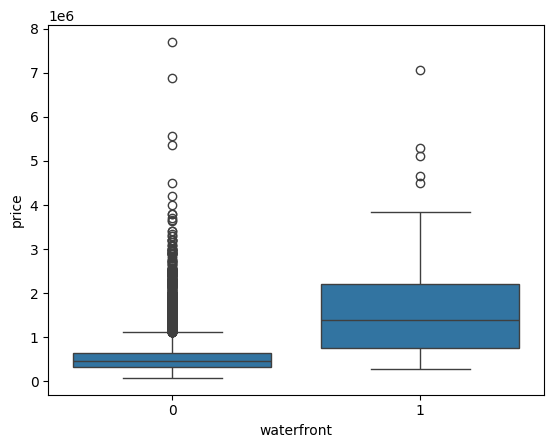

In [10]:
# create a boxplot to determine whether houses with a waterfront view or not have more price outliers
sns.boxplot(x='waterfront', y='price', data = df)

### Question 5

<Axes: xlabel='sqft_above', ylabel='price'>

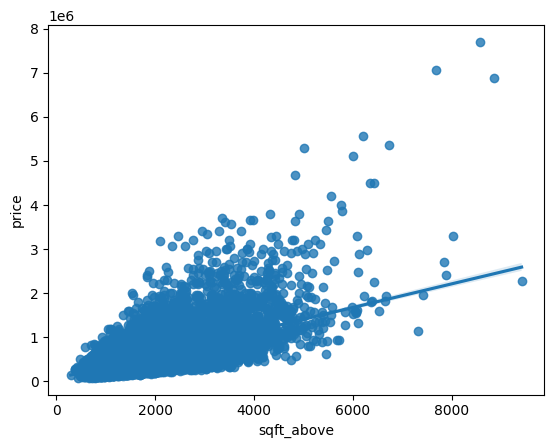

In [11]:
# use regplot to determine if the feature sqft_above is negatively or positively correlated with the price
sns.regplot(x='sqft_above', y='price', data = df)

In [12]:
# we also can find its correlation value by using this :
df[['sqft_above','price']].corr()

,sqft_above,price
sqft_above,1.000000,0.605567
price,0.605567,1.000000


### Question 6

In [13]:
#fit a linear regression model n calculate the r^2 for price using sqft_living
x = df[['sqft_living']]
y = df[['price']]

lm = LinearRegression()

lm.fit(x,y)
lm.score(x,y)

0.4928532179037931

### Question 7

In [14]:
#fit a linear regression model n calculate the r^2 for price using some variables in xmult
xmult = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]

lm2 = LinearRegression()

lm2.fit(xmult, y)
lm2.score(xmult,y)

0.6576861682430691

### Question 8

In [15]:
#use the list to create pipeline object to predict price, fit the object using the features in xmult, n calculate the r^2
inputs = [('Scale', StandardScaler()), ('Polynomial', PolynomialFeatures()), ('Model', LinearRegression())]

pipe = Pipeline(inputs)

pipe.fit(xmult, y)
pipe.score(xmult, y)

0.7513410826077004

In [16]:
#Preparing for the model evaluation n refinement
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#split the data into training n testing
xdata = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
ydata = df[['price']]

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.15, random_state=1)

print("number of test samples:", xtest.shape[0])
print("number of training samples:",xtrain.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 9

In [17]:
#create n fit a ridge regression using training, set parameter to 0.1 n calculate r2 using testing data

from sklearn.linear_model import Ridge

rd = Ridge(alpha=0.1)
rd.fit(xtrain, ytrain)
rd.score(xtest, ytest)

0.6478759163939112

### Question 10

In [18]:
#perform a second order polynomial transform on training n testing data
#create n fit a ridge regression using training, alpha to 0.1 n calculate r^2 using testing

pr = PolynomialFeatures(degree = 2)

xtrainpr = pr.fit_transform(xtrain)
xtestpr = pr.fit_transform(xtest)

rr = Ridge(alpha = 0.1)
rr.fit(xtrainpr, ytrain)
rr.score(xtestpr, ytest)

0.7002744273539745